## Практика: Вариант 25. Р1 (набор 1). Нейронная сеть (глубокая).

### Выполнила Палагутина Варвара

In [1]:
import numpy as np                               # работа с векторами и матрицами
import pandas as pd                              # таблицы и операции над данными
import matplotlib.pyplot as plt                  # графики
import seaborn as sns    

In [3]:
from dateutil.relativedelta import relativedelta # для комфортной работы с датами
from scipy.optimize import minimize              # позволяет минимизировать функции

import statsmodels.formula.api as smf            # статистика и эконометрика
import statsmodels.tsa.api as smt
import statsmodels.api as sm
import scipy.stats as scs
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, accuracy_score
from sklearn.metrics import mean_absolute_error
from keras.metrics import mape

from itertools import product                    # немножко функций для удобства
from tqdm import tqdm_notebook

import warnings                                  # чтобы никто не мешал
warnings.filterwarnings('ignore')

%matplotlib inline

In [189]:
df = pd.read_excel("Варианты_2023.05.28.xlsx", sheet_name="Набор 1")

In [190]:
df['Date'] = pd.to_datetime(df['Date'],dayfirst=True)

<AxesSubplot:>

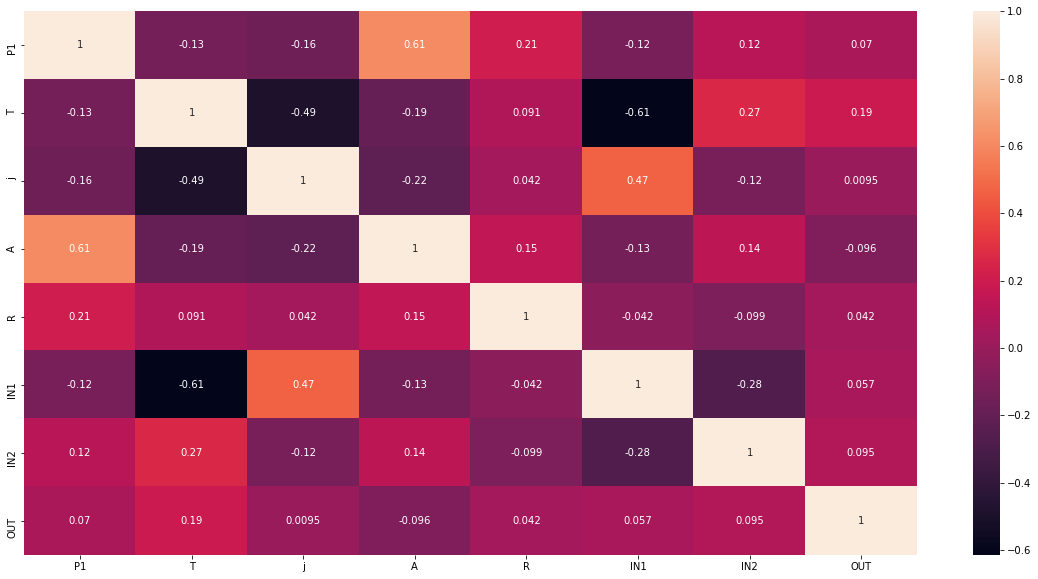

In [191]:
plt.figure(figsize=(20,10)) 
sns.heatmap(df.corr(), annot=True)

In [192]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68 entries, 0 to 67
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    68 non-null     datetime64[ns]
 1   P1      68 non-null     float64       
 2   T       68 non-null     float64       
 3   j       68 non-null     int64         
 4   A       68 non-null     float64       
 5   R       68 non-null     float64       
 6   IN1     68 non-null     float64       
 7   IN2     68 non-null     float64       
 8   OUT     68 non-null     float64       
dtypes: datetime64[ns](1), float64(7), int64(1)
memory usage: 4.9 KB


In [193]:
df.describe()

,P1,T,j,A,R,IN1,IN2,OUT
count,68.000000,68.000000,68.000000,68.000000,68.000000,68.000000,68.000000,68.000000
mean,17.122238,24.005882,56.735294,0.081176,0.002941,4.403985,7.542971,7.968765
std,1.662790,2.683219,9.595735,0.211826,0.024254,12.982371,9.409166,6.703289
min,14.552182,16.500000,38.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,15.653705,23.000000,49.750000,0.000000,0.000000,0.000000,0.000000,2.008500
50%,16.902636,24.500000,56.000000,0.000000,0.000000,0.000000,3.055000,7.550000
75%,18.473932,25.825000,62.250000,0.000000,0.000000,0.000000,12.368500,11.703500
max,20.326455,28.100000,79.000000,0.900000,0.200000,71.991000,40.320000,27.830000


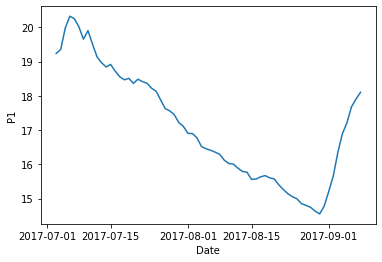

In [194]:
plt.plot(df['Date'], df['P1'])
plt.xlabel('Date')
plt.ylabel('P1')
plt.show()

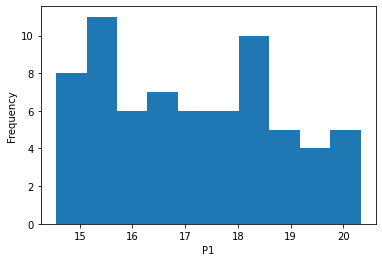

In [195]:
plt.hist(df['P1'], bins=10)
plt.xlabel('P1')
plt.ylabel('Frequency')
plt.show()

array([<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
       <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
       <AxesSubplot:>], dtype=object)

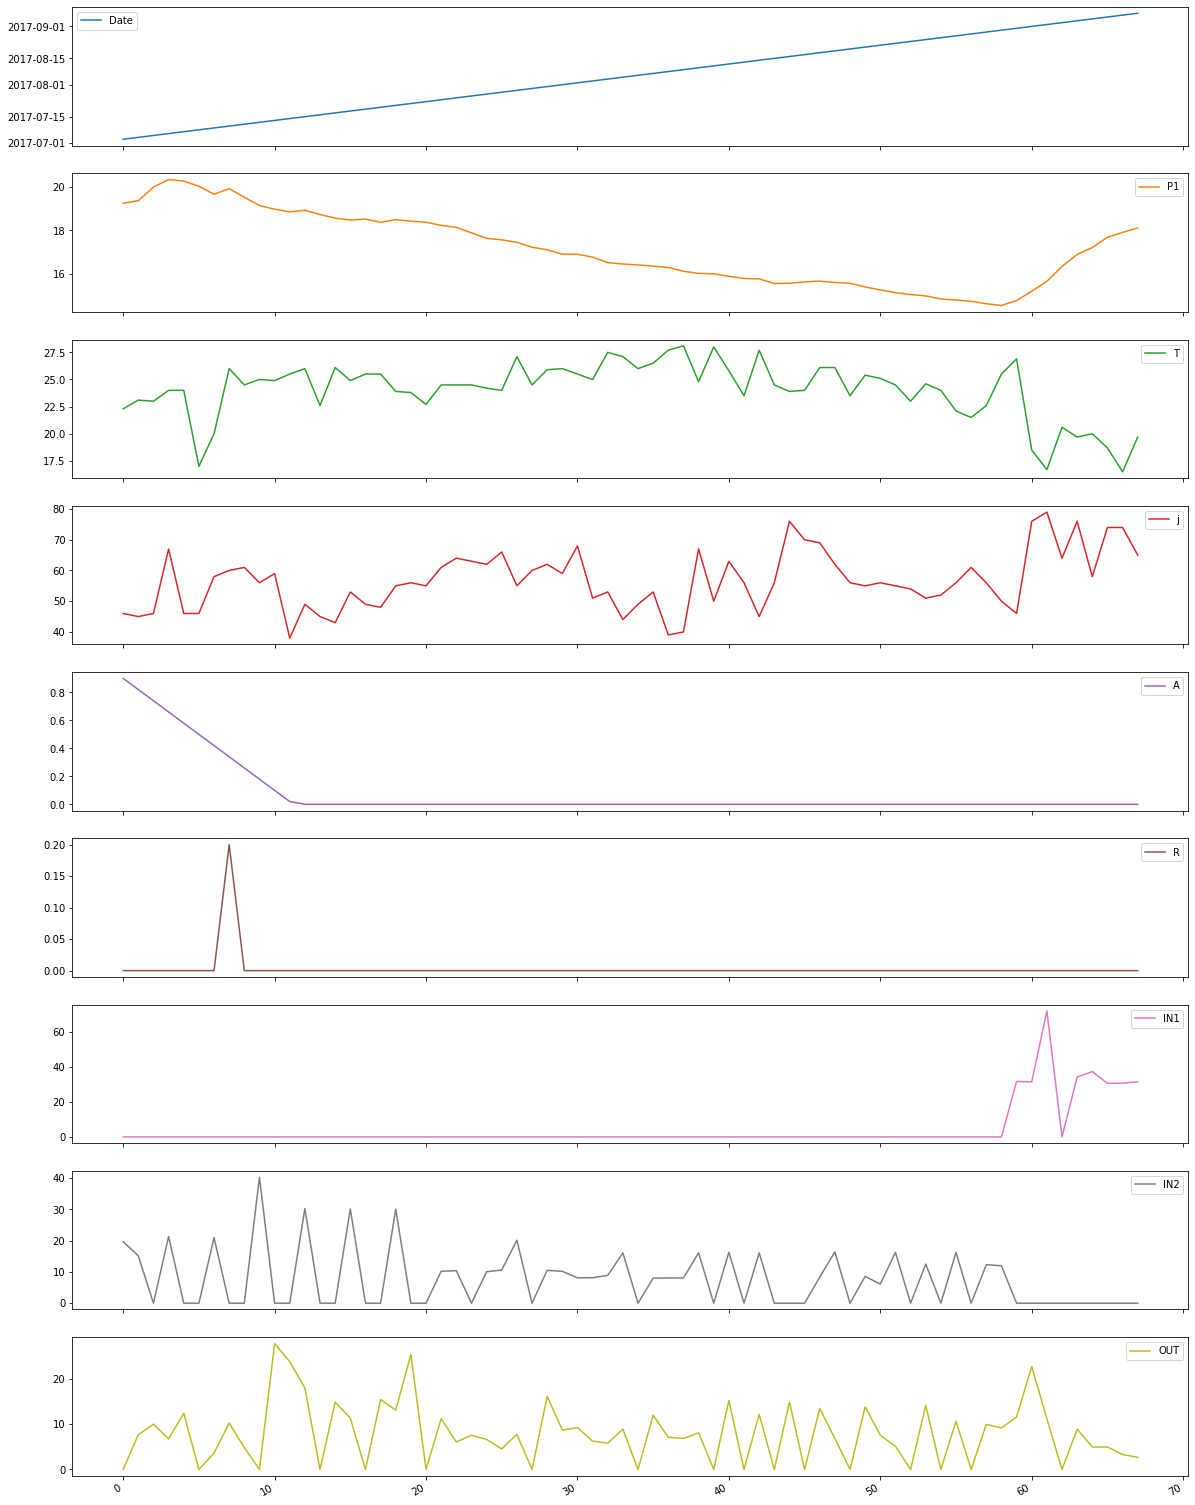

In [196]:
df.plot(subplots=True, figsize=(20,30))

In [197]:
df = df.set_index('Date')

In [198]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [199]:
x = df.drop('P1',axis=1)
y = df['P1']

In [200]:
sc.fit(x.values)
X_ans = sc.transform(x.values)
X_ans

array([[-6.40486449e-01, -1.12707479e+00,  3.89428908e+00,
        -1.22169444e-01, -3.41750307e-01,  1.30057680e+00,
        -1.19762290e+00],
       [-3.40120390e-01, -1.23206258e+00,  3.51381256e+00,
        -1.22169444e-01, -3.41750307e-01,  8.13089207e-01,
        -4.39995065e-02],
       [-3.77666147e-01, -1.12707479e+00,  3.13333604e+00,
        -1.22169444e-01, -3.41750307e-01, -8.07622362e-01,
         3.05123361e-01],
       [-2.20857396e-03,  1.07766877e+00,  2.75285952e+00,
        -1.22169444e-01, -3.41750307e-01,  1.47831223e+00,
        -1.80913382e-01],
       [-2.20857396e-03, -1.12707479e+00,  2.37238300e+00,
        -1.22169444e-01, -3.41750307e-01, -8.07622362e-01,
         6.70026643e-01],
       [-2.63041159e+00, -1.12707479e+00,  1.99190648e+00,
        -1.22169444e-01, -3.41750307e-01, -8.07622362e-01,
        -1.19762290e+00],
       [-1.50403887e+00,  1.32778674e-01,  1.61142996e+00,
        -1.22169444e-01, -3.41750307e-01,  1.43869651e+00,
        -6.5237202

In [201]:
sc_out = StandardScaler()
Y_ans = sc_out.fit_transform(y.values.reshape(y.shape[0],1))
Y_ans = Y_ans.reshape(-1)
y = Y_ans

In [202]:
X_ans.shape

(68, 7)

In [203]:
df.values.shape

(68, 8)

In [204]:
days = 12
train_size = len(X_ans) - days
test_size = days

X_train, X_test = X_ans[:train_size,:], X_ans[train_size:,:]
Y_train, Y_test = y[:train_size], y[train_size:]

SEQ_LENGTH = 7
X_train = np.reshape(X_train, (X_train.shape[0], 1, SEQ_LENGTH))
X_test = np.reshape(X_test, (X_test.shape[0], 1, SEQ_LENGTH))

print('X_train scaled shape is ',X_train.shape)
print('X_test scaled shape is ',X_test.shape)
print('Y_train shape is ', Y_train.shape)
print('Y_test shape is ', Y_test.shape)

X_train scaled shape is  (56, 1, 7)
X_test scaled shape is  (12, 1, 7)
Y_train shape is  (56,)
Y_test shape is  (12,)


In [205]:
from keras.models import Sequential
from keras.layers import Dense, SimpleRNN
from tensorflow.keras.layers import LSTM, TimeDistributed, Conv1D, MaxPooling1D, Flatten, GlobalMaxPooling1D, Embedding, Input, Reshape, Dropout, BatchNormalization
from keras import regularizers
from keras.callbacks import EarlyStopping
from mdrnn import MDRNN, MDLSTM, MultiDirectional
from tensorflow.keras.layers import Bidirectional

для корректного построения графиков в дальнейшем необходимо запускать блоки только необходимой модели, если данные прошли через функцию inverse_transform(), то дальше необходимо запустить код сначала, чтобы они снова были преобразованы в необходимую форму

# Bidirectional

In [47]:
MDRNN_FIRST = Sequential([
    Bidirectional(LSTM(10, return_sequences=True,activation='elu'), input_shape=(X_train.shape[1],X_train.shape[2])),
    Dropout(0.25),
    LSTM(10, return_sequences=False, activation='exponential'),
    Dropout(0.25),
    Dense(1,activation='linear')
])

In [48]:
MDRNN_FIRST.compile(loss='mean_absolute_error', optimizer='adam')
print(MDRNN_FIRST.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bidirectional (Bidirectiona  (None, 1, 20)            1440      
 l)                                                              
                                                                 
 dropout (Dropout)           (None, 1, 20)             0         
                                                                 
 lstm_1 (LSTM)               (None, 10)                1240      
                                                                 
 dropout_1 (Dropout)         (None, 10)                0         
                                                                 
 dense_2 (Dense)             (None, 1)                 11        
                                                                 
Total params: 2,691
Trainable params: 2,691
Non-trainable params: 0
____________________________________________________

In [49]:
early_stopping = EarlyStopping(monitor='val_loss', mode='min', patience=10) # остановка обучения, если качество не улучшается в течение 5 эпох
HISTORY_MDRNN_FIRST = MDRNN_FIRST.fit(
    X_train, 
    Y_train,
    validation_data=(X_test, Y_test),
    batch_size=12,
    epochs=605,
    shuffle=False,
    callbacks=[early_stopping]
)

Epoch 1/605
5/5 [==============================] - 3s 79ms/step - loss: 1.2135 - val_loss: 0.8179
Epoch 2/605
5/5 [==============================] - 0s 6ms/step - loss: 1.2164 - val_loss: 0.8166
Epoch 3/605
5/5 [==============================] - 0s 6ms/step - loss: 1.1033 - val_loss: 0.8149
Epoch 4/605
5/5 [==============================] - 0s 7ms/step - loss: 1.1697 - val_loss: 0.8132
Epoch 5/605
5/5 [==============================] - 0s 6ms/step - loss: 1.1733 - val_loss: 0.8114
Epoch 6/605
5/5 [==============================] - 0s 6ms/step - loss: 1.0625 - val_loss: 0.8100
Epoch 7/605
5/5 [==============================] - 0s 6ms/step - loss: 1.3485 - val_loss: 0.8091
Epoch 8/605
5/5 [==============================] - 0s 7ms/step - loss: 1.1876 - val_loss: 0.8088
Epoch 9/605
5/5 [==============================] - 0s 7ms/step - loss: 1.0495 - val_loss: 0.8082
Epoch 10/605
5/5 [==============================] - 0s 7ms/step - loss: 1.0754 - val_loss: 0.8076
Epoch 11/605
5/5 [==========

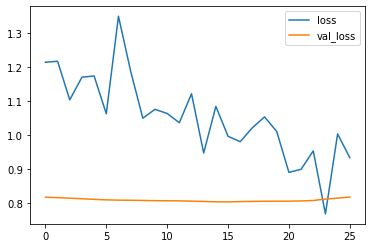

In [50]:
plt.plot(HISTORY_MDRNN_FIRST.history['loss'], label='loss')
plt.plot(HISTORY_MDRNN_FIRST.history['val_loss'], label='val_loss')
plt.legend();

In [51]:
PREDICTION_MDRNN_FIRST = MDRNN_FIRST.predict(X_test)
PREDICTION_MDRNN_FIRST_train = MDRNN_FIRST.predict(X_train)

2/2 [==============================] - 0s 2ms/step


In [52]:
PREDICTION_MDRNN_FIRST = sc_out.inverse_transform(PREDICTION_MDRNN_FIRST.reshape(PREDICTION_MDRNN_FIRST.shape[0],1)).reshape(-1)
PREDICTION_MDRNN_FIRST_train = sc_out.inverse_transform(PREDICTION_MDRNN_FIRST_train.reshape(PREDICTION_MDRNN_FIRST_train.shape[0],1)).reshape(-1)
Y_test = sc_out.inverse_transform(Y_test.reshape(Y_test.shape[0],1)).reshape(-1)
Y_train = sc_out.inverse_transform(Y_train.reshape(Y_train.shape[0],1)).reshape(-1)

In [53]:
model_prediction = PREDICTION_MDRNN_FIRST
model_prediction_train = PREDICTION_MDRNN_FIRST_train

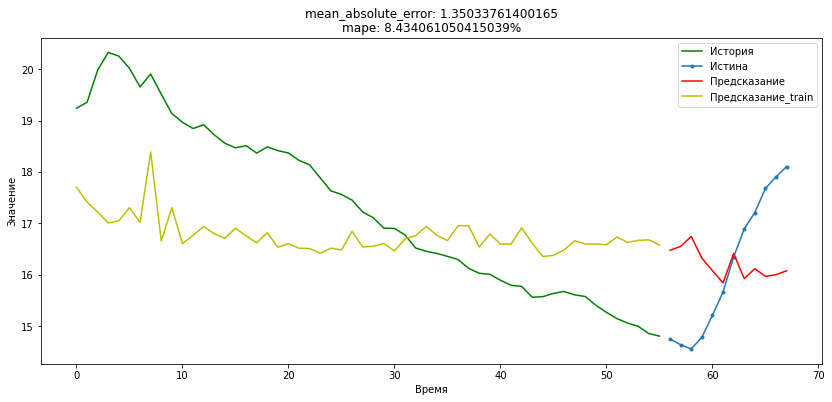

In [54]:
plt.figure(figsize=(14, 6))
plt.plot(np.arange(0, len(Y_train)), Y_train, 'g', label="История")
plt.plot(np.arange(len(Y_train), len(Y_train) + len(Y_test)), Y_test, marker='.', label="Истина")
plt.plot(np.arange(len(Y_train), len(Y_train) + len(Y_test)), model_prediction, 'r', label="Предсказание")
plt.plot(np.arange(0, len(Y_train)), model_prediction_train, 'y', label="Предсказание_train")
plt.ylabel('Значение')
plt.xlabel('Время')
mse = mean_absolute_error(Y_test, model_prediction)
m = mape(Y_test, model_prediction)
plt.title('mean_absolute_error: {}'.format(mse) + '\nmape: {}%'.format(m))

plt.legend()
plt.show()

# MDRNN

In [153]:
MDRNN_FIRST = Sequential([
    MDRNN(units=100, input_shape=(X_train.shape[1],X_train.shape[2]), activation='tanh'),
    
    Dense(1,activation='linear')
])

In [154]:
MDRNN_FIRST.compile(loss='mean_absolute_error', optimizer='adam')
print(MDRNN_FIRST.summary())

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mdrnn_3 (MDRNN)             (None, 100)               10800     
                                                                 
 dense_6 (Dense)             (None, 1)                 101       
                                                                 
Total params: 10,901
Trainable params: 10,901
Non-trainable params: 0
_________________________________________________________________
None


In [155]:
early_stopping = EarlyStopping(monitor='val_loss', mode='min', patience=10) # остановка обучения, если качество не улучшается в течение 5 эпох
HISTORY_MDRNN_FIRST = MDRNN_FIRST.fit(
    X_train, 
    Y_train,
    validation_data=(X_test, Y_test),
    batch_size=12,
    epochs=605,
    shuffle=False,
    callbacks=[early_stopping]
)

Epoch 1/605
5/5 [==============================] - 0s 25ms/step - loss: 0.9418 - val_loss: 1.1177
Epoch 2/605
5/5 [==============================] - 0s 5ms/step - loss: 0.8650 - val_loss: 1.0796
Epoch 3/605
5/5 [==============================] - 0s 5ms/step - loss: 0.8104 - val_loss: 1.0412
Epoch 4/605
5/5 [==============================] - 0s 5ms/step - loss: 0.7799 - val_loss: 1.0095
Epoch 5/605
5/5 [==============================] - 0s 5ms/step - loss: 0.7555 - val_loss: 0.9834
Epoch 6/605
5/5 [==============================] - 0s 6ms/step - loss: 0.7353 - val_loss: 0.9624
Epoch 7/605
5/5 [==============================] - 0s 5ms/step - loss: 0.7257 - val_loss: 0.9468
Epoch 8/605
5/5 [==============================] - 0s 6ms/step - loss: 0.7254 - val_loss: 0.9405
Epoch 9/605
5/5 [==============================] - 0s 5ms/step - loss: 0.7217 - val_loss: 0.9414
Epoch 10/605
5/5 [==============================] - 0s 6ms/step - loss: 0.7125 - val_loss: 0.9452
Epoch 11/605
5/5 [==========

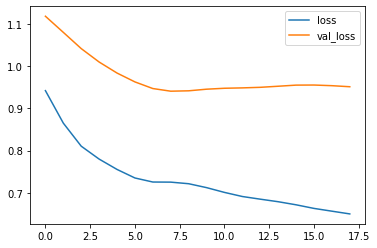

In [156]:
plt.plot(HISTORY_MDRNN_FIRST.history['loss'], label='loss')
plt.plot(HISTORY_MDRNN_FIRST.history['val_loss'], label='val_loss')
plt.legend();

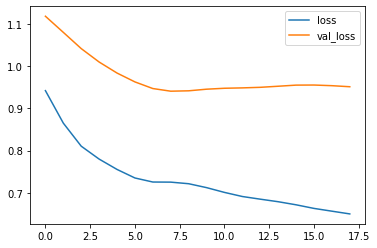

In [157]:
plt.plot(HISTORY_MDRNN_FIRST.history['loss'], label='loss')
plt.plot(HISTORY_MDRNN_FIRST.history['val_loss'], label='val_loss')
plt.legend();

In [158]:
PREDICTION_MDRNN_FIRST = MDRNN_FIRST.predict(X_test)
PREDICTION_MDRNN_FIRST_train = MDRNN_FIRST.predict(X_train)

2/2 [==============================] - 0s 2ms/step


In [159]:
PREDICTION_MDRNN_FIRST = sc_out.inverse_transform(PREDICTION_MDRNN_FIRST.reshape(PREDICTION_MDRNN_FIRST.shape[0],1)).reshape(-1)
PREDICTION_MDRNN_FIRST_train = sc_out.inverse_transform(PREDICTION_MDRNN_FIRST_train.reshape(PREDICTION_MDRNN_FIRST_train.shape[0],1)).reshape(-1)
Y_test = sc_out.inverse_transform(Y_test.reshape(Y_test.shape[0],1)).reshape(-1)
Y_train = sc_out.inverse_transform(Y_train.reshape(Y_train.shape[0],1)).reshape(-1)

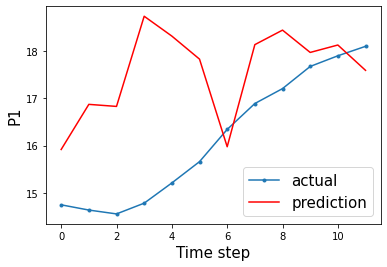

In [160]:
aa=[x for x in range(test_size)]
plt.plot(aa, Y_test, marker='.', label="actual")
plt.plot(aa, PREDICTION_MDRNN_FIRST, 'r', label="prediction")
plt.ylabel('P1', size=15)
plt.xlabel('Time step', size=15)
plt.legend(fontsize=15)
plt.show()

In [161]:
model_prediction = PREDICTION_MDRNN_FIRST
model_prediction_train = PREDICTION_MDRNN_FIRST_train

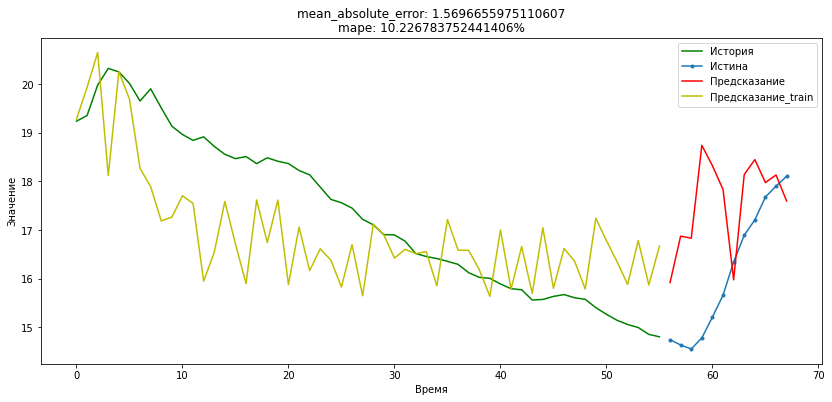

In [162]:
plt.figure(figsize=(14, 6))
plt.plot(np.arange(0, len(Y_train)), Y_train, 'g', label="История")
plt.plot(np.arange(len(Y_train), len(Y_train) + len(Y_test)), Y_test, marker='.', label="Истина")
plt.plot(np.arange(len(Y_train), len(Y_train) + len(Y_test)), model_prediction, 'r', label="Предсказание")
plt.plot(np.arange(0, len(Y_train)), model_prediction_train, 'y', label="Предсказание_train")
plt.ylabel('Значение')
plt.xlabel('Время')
mse = mean_absolute_error(Y_test, model_prediction)
m = mape(Y_test, model_prediction)
plt.title('mean_absolute_error: {}'.format(mse) + '\nmape: {}%'.format(m))

plt.legend()
plt.show()

# LSTM 1 вариант

In [180]:
LSTM_MODEL_FIRST = Sequential([
    LSTM(20, return_sequences=True, input_shape=(X_train.shape[1],X_train.shape[2])),
    #Dropout(0.25),
    LSTM(20,return_sequences=False, activation='relu'),
    Dropout(0.15),
    Dense(1,activation='linear')
])

In [181]:
LSTM_MODEL_FIRST.compile(loss='mean_absolute_error', optimizer='adam')
print(LSTM_MODEL_FIRST.summary())

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (None, 1, 20)             2240      
                                                                 
 lstm_3 (LSTM)               (None, 20)                3280      
                                                                 
 dropout_2 (Dropout)         (None, 20)                0         
                                                                 
 dense_7 (Dense)             (None, 1)                 21        
                                                                 
Total params: 5,541
Trainable params: 5,541
Non-trainable params: 0
_________________________________________________________________
None


In [182]:
early_stopping = EarlyStopping(monitor='val_loss', mode='min', patience=10) # остановка обучения, если качество не улучшается в течение 5 эпох
HISTORY_LSTM_MODEL_FIRST = LSTM_MODEL_FIRST.fit(
    X_train, Y_train,
    validation_data=(X_test, Y_test),
    batch_size=8,
    epochs=100,
    shuffle=False,
#     callbacks=[early_stopping]
)

Epoch 1/100
7/7 [==============================] - 2s 66ms/step - loss: 0.8820 - val_loss: 0.8403
Epoch 2/100
7/7 [==============================] - 0s 5ms/step - loss: 0.8782 - val_loss: 0.8404
Epoch 3/100
7/7 [==============================] - 0s 5ms/step - loss: 0.8755 - val_loss: 0.8401
Epoch 4/100
7/7 [==============================] - 0s 5ms/step - loss: 0.8747 - val_loss: 0.8398
Epoch 5/100
7/7 [==============================] - 0s 5ms/step - loss: 0.8720 - val_loss: 0.8394
Epoch 6/100
7/7 [==============================] - 0s 5ms/step - loss: 0.8699 - val_loss: 0.8390
Epoch 7/100
7/7 [==============================] - 0s 5ms/step - loss: 0.8674 - val_loss: 0.8386
Epoch 8/100
7/7 [==============================] - 0s 5ms/step - loss: 0.8657 - val_loss: 0.8381
Epoch 9/100
7/7 [==============================] - 0s 5ms/step - loss: 0.8617 - val_loss: 0.8375
Epoch 10/100
7/7 [==============================] - 0s 5ms/step - loss: 0.8593 - val_loss: 0.8371
Epoch 11/100
7/7 [==========

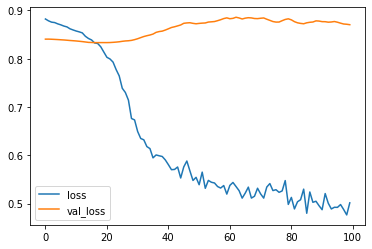

In [183]:
plt.plot(HISTORY_LSTM_MODEL_FIRST.history['loss'], label='loss')
plt.plot(HISTORY_LSTM_MODEL_FIRST.history['val_loss'], label='val_loss')
plt.legend();

In [184]:
PREDICTION_LSTM_MODEL_FIRST = LSTM_MODEL_FIRST.predict(X_test)
PREDICTION_LSTM_MODEL_FIRST_train = LSTM_MODEL_FIRST.predict(X_train)

2/2 [==============================] - 0s 2ms/step


In [185]:
PREDICTION_LSTM_MODEL_FIRST = sc_out.inverse_transform(PREDICTION_LSTM_MODEL_FIRST.reshape(PREDICTION_LSTM_MODEL_FIRST.shape[0],1)).reshape(-1)
PREDICTION_LSTM_MODEL_FIRST_train = sc_out.inverse_transform(PREDICTION_LSTM_MODEL_FIRST_train.reshape(PREDICTION_LSTM_MODEL_FIRST_train.shape[0],1)).reshape(-1)
Y_test = sc_out.inverse_transform(Y_test.reshape(Y_test.shape[0],1)).reshape(-1)
Y_train = sc_out.inverse_transform(Y_train.reshape(Y_train.shape[0],1)).reshape(-1)

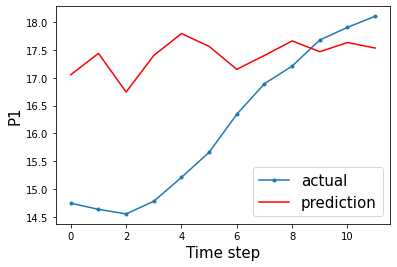

In [186]:
aa=[x for x in range(test_size)]
plt.plot(aa, Y_test, marker='.', label="actual")
plt.plot(aa, PREDICTION_LSTM_MODEL_FIRST, 'r', label="prediction")
plt.ylabel('P1', size=15)
plt.xlabel('Time step', size=15)
plt.legend(fontsize=15)
plt.show()

In [187]:
model_prediction = PREDICTION_LSTM_MODEL_FIRST
model_prediction_train = PREDICTION_LSTM_MODEL_FIRST_train

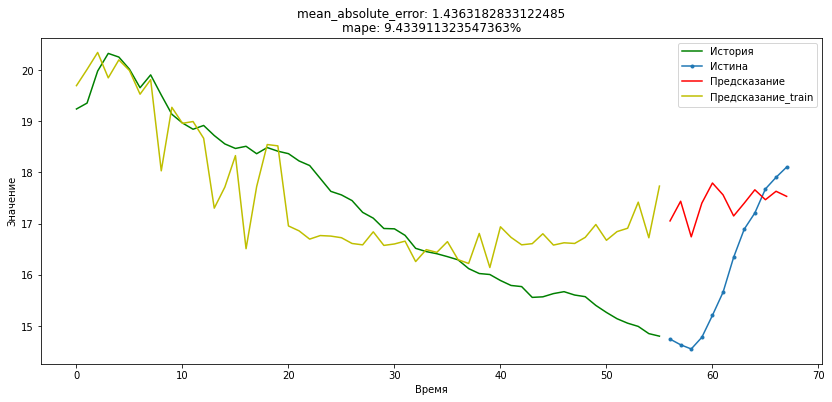

In [188]:
plt.figure(figsize=(14, 6))
plt.plot(np.arange(0, len(Y_train)), Y_train, 'g', label="История")
plt.plot(np.arange(len(Y_train), len(Y_train) + len(Y_test)), Y_test, marker='.', label="Истина")
plt.plot(np.arange(len(Y_train), len(Y_train) + len(Y_test)), model_prediction, 'r', label="Предсказание")
plt.plot(np.arange(0, len(Y_train)), model_prediction_train, 'y', label="Предсказание_train")
plt.ylabel('Значение')
plt.xlabel('Время')
mse = mean_absolute_error(Y_test, model_prediction)
m = mape(Y_test, model_prediction)
plt.title('mean_absolute_error: {}'.format(mse) + '\nmape: {}%'.format(m))

plt.legend()
plt.show()

# LSTM 2 вариант

In [206]:
LSTM_new1 = Sequential([
    LSTM(10, input_shape=(X_train.shape[1],X_train.shape[2]), return_sequences=True,activation='elu'),
    Dropout(0.1),
    LSTM(10, return_sequences=True,activation='exponential'),
    Dropout(0.25),
    LSTM(10, return_sequences=False,activation='exponential'),
    Dropout(0.25),
    Dense(1,activation='linear')
])

In [207]:
LSTM_new1.compile(loss='mean_absolute_error', optimizer='adam')
print(LSTM_new1.summary())

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_4 (LSTM)               (None, 1, 10)             720       
                                                                 
 dropout_3 (Dropout)         (None, 1, 10)             0         
                                                                 
 lstm_5 (LSTM)               (None, 1, 10)             840       
                                                                 
 dropout_4 (Dropout)         (None, 1, 10)             0         
                                                                 
 lstm_6 (LSTM)               (None, 10)                840       
                                                                 
 dropout_5 (Dropout)         (None, 10)                0         
                                                                 
 dense_8 (Dense)             (None, 1)                

In [208]:
early_stopping = EarlyStopping(monitor='val_loss', mode='min', patience=10) # остановка обучения, если качество не улучшается в течение 5 эпох
HISTORY_LSTM_new1 = LSTM_new1.fit(
    X_train, 
    Y_train,
    validation_data=(X_test, Y_test),
    batch_size=8,
    epochs=100,
    shuffle=False,
#     callbacks=[early_stopping]
)

Epoch 1/100
7/7 [==============================] - 2s 55ms/step - loss: 1.4593 - val_loss: 0.7613
Epoch 2/100
7/7 [==============================] - 0s 5ms/step - loss: 1.3407 - val_loss: 0.7349
Epoch 3/100
7/7 [==============================] - 0s 5ms/step - loss: 1.2076 - val_loss: 0.7361
Epoch 4/100
7/7 [==============================] - 0s 5ms/step - loss: 1.2631 - val_loss: 0.7373
Epoch 5/100
7/7 [==============================] - 0s 5ms/step - loss: 1.1142 - val_loss: 0.7387
Epoch 6/100
7/7 [==============================] - 0s 5ms/step - loss: 1.0624 - val_loss: 0.7487
Epoch 7/100
7/7 [==============================] - 0s 5ms/step - loss: 1.0124 - val_loss: 0.7600
Epoch 8/100
7/7 [==============================] - 0s 5ms/step - loss: 1.1724 - val_loss: 0.7670
Epoch 9/100
7/7 [==============================] - 0s 5ms/step - loss: 1.0435 - val_loss: 0.7718
Epoch 10/100
7/7 [==============================] - 0s 5ms/step - loss: 0.9112 - val_loss: 0.7770
Epoch 11/100
7/7 [==========

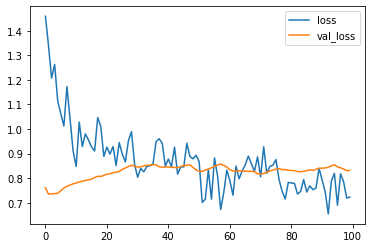

In [209]:
plt.plot(HISTORY_LSTM_new1.history['loss'], label='loss')
plt.plot(HISTORY_LSTM_new1.history['val_loss'], label='val_loss')
plt.legend();

In [210]:
PREDICTION_LSTM_new1 = LSTM_new1.predict(X_test)
PREDICTION_LSTM_new1_train = LSTM_new1.predict(X_train)

2/2 [==============================] - 0s 2ms/step


In [211]:
PREDICTION_LSTM_new1 = sc_out.inverse_transform(PREDICTION_LSTM_new1.reshape(PREDICTION_LSTM_new1.shape[0],1)).reshape(-1)
PREDICTION_LSTM_new1_train = sc_out.inverse_transform(PREDICTION_LSTM_new1_train.reshape(PREDICTION_LSTM_new1_train.shape[0],1)).reshape(-1)
Y_test = sc_out.inverse_transform(Y_test.reshape(Y_test.shape[0],1)).reshape(-1)
Y_train = sc_out.inverse_transform(Y_train.reshape(Y_train.shape[0],1)).reshape(-1)

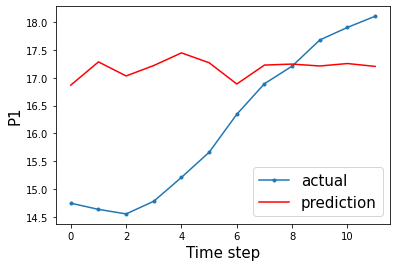

In [212]:
aa=[x for x in range(test_size)]
plt.plot(aa, Y_test, marker='.', label="actual")
plt.plot(aa, PREDICTION_LSTM_new1, 'r', label="prediction")
plt.ylabel('P1', size=15)
plt.xlabel('Time step', size=15)
plt.legend(fontsize=15)
plt.show()

In [213]:
model_prediction = PREDICTION_LSTM_new1
model_prediction_train = PREDICTION_LSTM_new1_train

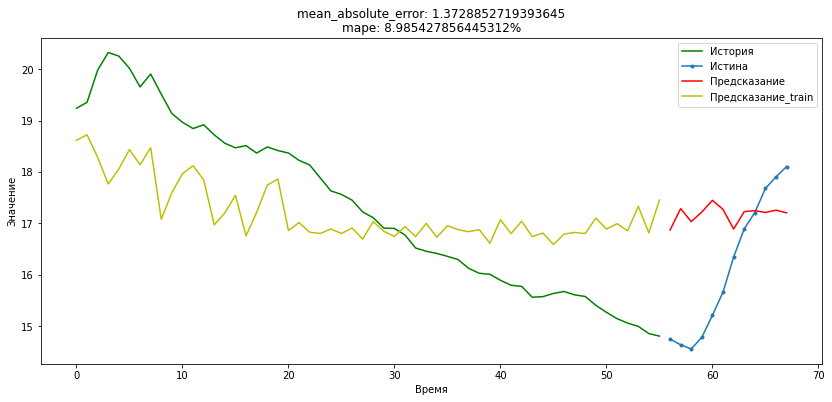

In [214]:
plt.figure(figsize=(14, 6))
plt.plot(np.arange(0, len(Y_train)), Y_train, 'g', label="История")
plt.plot(np.arange(len(Y_train), len(Y_train) + len(Y_test)), Y_test, marker='.', label="Истина")
plt.plot(np.arange(len(Y_train), len(Y_train) + len(Y_test)), model_prediction, 'r', label="Предсказание")
plt.plot(np.arange(0, len(Y_train)), model_prediction_train, 'y', label="Предсказание_train")
mse = mean_absolute_error(Y_test, model_prediction)
m = mape(Y_test, model_prediction)
plt.title('mean_absolute_error: {}'.format(mse) + '\nmape: {}%'.format(m))

plt.ylabel('Значение')
plt.xlabel('Время')
plt.legend()
plt.show()

# RNN

In [21]:
RNN_FIRST = Sequential([
    SimpleRNN(100, input_shape=(X_train.shape[1],X_train.shape[2]), activation="tanh", return_sequences=True),
#     Dropout(0.1),
    SimpleRNN(100, return_sequences=True),
#     Dropout(0.1),
    SimpleRNN(100),
    Dense(32),
    Dense(1,activation='linear')
])

In [22]:
RNN_FIRST.compile(loss='mean_absolute_error', optimizer='adam')
print(RNN_FIRST.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, 1, 100)            10800     
                                                                 
 simple_rnn_1 (SimpleRNN)    (None, 1, 100)            20100     
                                                                 
 simple_rnn_2 (SimpleRNN)    (None, 100)               20100     
                                                                 
 dense (Dense)               (None, 32)                3232      
                                                                 
 dense_1 (Dense)             (None, 1)                 33        
                                                                 
Total params: 54,265
Trainable params: 54,265
Non-trainable params: 0
_________________________________________________________________
None


In [23]:
early_stopping = EarlyStopping(monitor='val_loss', mode='min', patience=10) # остановка обучения, если качество не улучшается в течение 5 эпох
HISTORY_RNN_FIRST = RNN_FIRST.fit(
    X_train, 
    Y_train,
    validation_data=(X_test, Y_test),
    batch_size=8,
    epochs=100,
    shuffle=False,
#     callbacks=[early_stopping]
)

Epoch 1/100
7/7 [==============================] - 2s 52ms/step - loss: 0.7741 - val_loss: 0.8072
Epoch 2/100
7/7 [==============================] - 0s 5ms/step - loss: 0.7680 - val_loss: 0.8506
Epoch 3/100
7/7 [==============================] - 0s 5ms/step - loss: 0.6738 - val_loss: 0.8739
Epoch 4/100
7/7 [==============================] - 0s 5ms/step - loss: 0.6237 - val_loss: 0.9008
Epoch 5/100
7/7 [==============================] - 0s 5ms/step - loss: 0.6177 - val_loss: 0.9141
Epoch 6/100
7/7 [==============================] - 0s 5ms/step - loss: 0.6031 - val_loss: 0.9053
Epoch 7/100
7/7 [==============================] - 0s 5ms/step - loss: 0.5839 - val_loss: 0.8612
Epoch 8/100
7/7 [==============================] - 0s 5ms/step - loss: 0.5797 - val_loss: 0.8617
Epoch 9/100
7/7 [==============================] - 0s 5ms/step - loss: 0.5825 - val_loss: 0.9073
Epoch 10/100
7/7 [==============================] - 0s 5ms/step - loss: 0.5660 - val_loss: 0.9227
Epoch 11/100
7/7 [==========

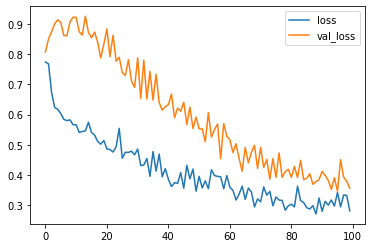

In [24]:
plt.plot(HISTORY_RNN_FIRST.history['loss'], label='loss')
plt.plot(HISTORY_RNN_FIRST.history['val_loss'], label='val_loss')
plt.legend();

In [25]:
PREDICTION_RNN_FIRST = RNN_FIRST.predict(X_test)
PREDICTION_RNN_FIRST_train = RNN_FIRST.predict(X_train)

2/2 [==============================] - 0s 999us/step


In [26]:
PREDICTION_RNN_FIRST = sc_out.inverse_transform(PREDICTION_RNN_FIRST.reshape(PREDICTION_RNN_FIRST.shape[0],1)).reshape(-1)
PREDICTION_RNN_FIRST_train = sc_out.inverse_transform(PREDICTION_RNN_FIRST_train.reshape(PREDICTION_RNN_FIRST_train.shape[0],1)).reshape(-1)
Y_test = sc_out.inverse_transform(Y_test.reshape(Y_test.shape[0],1)).reshape(-1)
Y_train = sc_out.inverse_transform(Y_train.reshape(Y_train.shape[0],1)).reshape(-1)

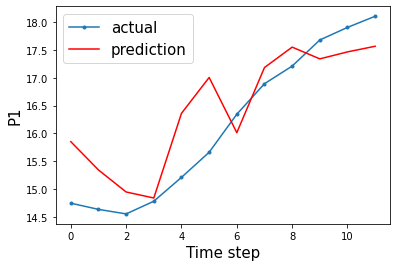

In [27]:
aa=[x for x in range(test_size)]
plt.plot(aa, Y_test, marker='.', label="actual")
plt.plot(aa, PREDICTION_RNN_FIRST, 'r', label="prediction")
plt.ylabel('P1', size=15)
plt.xlabel('Time step', size=15)
plt.legend(fontsize=15)
plt.show()

In [28]:
model_prediction = PREDICTION_RNN_FIRST
model_prediction_train = PREDICTION_RNN_FIRST_train

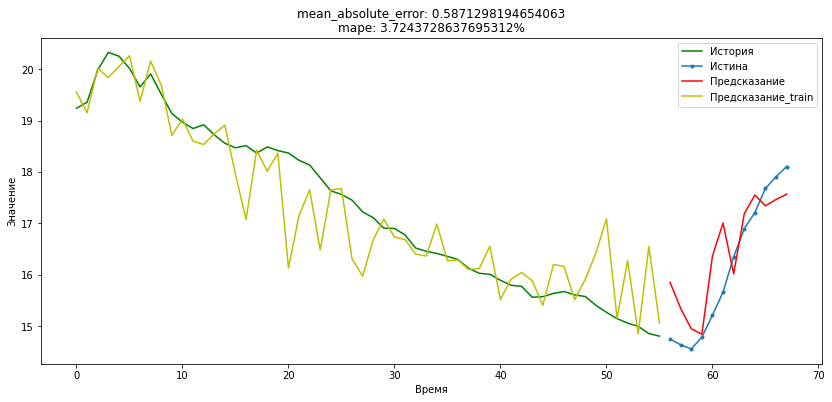

In [29]:
plt.figure(figsize=(14, 6))
plt.plot(np.arange(0, len(Y_train)), Y_train, 'g', label="История")
plt.plot(np.arange(len(Y_train), len(Y_train) + len(Y_test)), Y_test, marker='.', label="Истина")
plt.plot(np.arange(len(Y_train), len(Y_train) + len(Y_test)), model_prediction, 'r', label="Предсказание")
plt.plot(np.arange(0, len(Y_train)), model_prediction_train, 'y', label="Предсказание_train")
plt.ylabel('Значение')
plt.xlabel('Время')
mse = mean_absolute_error(Y_test, model_prediction)
m = mape(Y_test, model_prediction)
plt.title('mean_absolute_error: {}'.format(mse) + '\nmape: {}%'.format(m))

plt.legend()
plt.show()